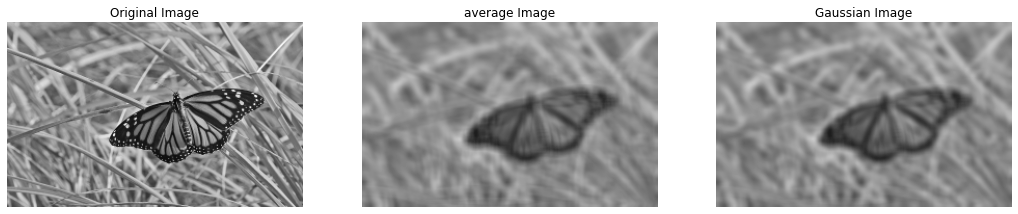

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r'images/butterfly.jpg' , cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img is not None
k_size = 9
sigma = 4

box_kernel = np.ones((9,9)) / 81
img_avg = cv.filter2D(img , -1 , box_kernel)
img_gaussian = cv.GaussianBlur(img , (k_size , k_size) , sigma)

fig , ax = plt.subplots(1 , 3 , figsize = (18 , 6))
ax[0].imshow(img , cmap = 'gray' , vmin = 0 , vmax = 255 )
ax[0].axis('off')
ax[0].title.set_text("Original Image")

ax[1].imshow(img_avg , cmap = 'gray' , vmin = 0 , vmax = 255)
ax[1].axis('off')
ax[1].title.set_text("average Image")

ax[2].imshow(img_gaussian , cmap = 'gray' , vmin = 0 , vmax = 255)
ax[2].axis('off')
ax[2].title.set_text("Gaussian Image")


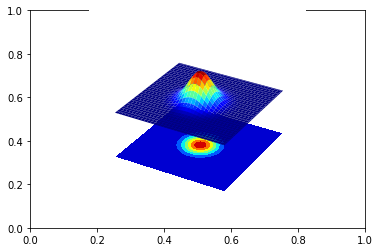

In [68]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig , ax = plt.subplots()
ax = fig.add_subplot(111 , projection = '3d')

step = 0.1
X = np.arange(-5 , 5 + step , step)
Y = np.arange(-5 , 5 + step , step)
XX , YY = np.meshgrid(X , Y)
sigma = 1
g = np.exp(-(XX ** 2 + YY ** 2) / (2 * sigma ** 2))

surf = ax.plot_surface(XX , YY , g , cmap = cm.jet)
cset = ax.contourf(XX , YY , g , zdir = 'z' , offset = np.min(g) - 1.5 , cmap = cm.jet)
ax.set_zlim(np.min(g) - 2 , np.max(g))
ax.set_axis_off()
plt.show()


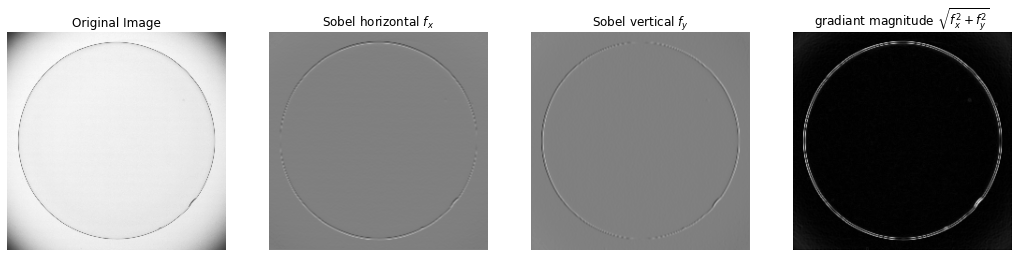

In [26]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r'images/contact_lens.tif' , cv.IMREAD_REDUCED_GRAYSCALE_4).astype(np.float32)
assert img is not None

sobel_vertical = np.array([[-1 , -2 , -1] , [0 , 0 , 0] , [1 , 2 , 1]] , dtype = np.float32)
sobel_horizontal = np.array([[-1 , 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1]] , dtype = np.float32)

img_x = cv.filter2D(img , -1 , sobel_vertical)
img_y = cv.filter2D(img , -1 , sobel_horizontal)
img_gaussian = cv.GaussianBlur(img , (k_size , k_size) , sigma)
grad_mag = np.sqrt(img_x ** 2 + img_y ** 2)


fig , ax = plt.subplots(1 , 4 , figsize = (18 , 6))
ax[0].imshow(img , cmap = 'gray' , vmin = 0 , vmax = 255 )
ax[0].axis('off')
ax[0].title.set_text("Original Image")

ax[1].imshow(img_x , cmap = 'gray' , vmin = -1020 , vmax = 1020)
ax[1].axis('off')
ax[1].title.set_text("Sobel horizontal $f_x$")

ax[2].imshow(img_y , cmap = 'gray' , vmin = -1020 , vmax = 1020)
ax[2].axis('off')
ax[2].title.set_text("Sobel vertical $f_y$")

ax[3].imshow(grad_mag , cmap = 'gray')
ax[3].axis('off')
ax[3].title.set_text("gradiant magnitude $\sqrt{f_x^2 + f_y^2}$")

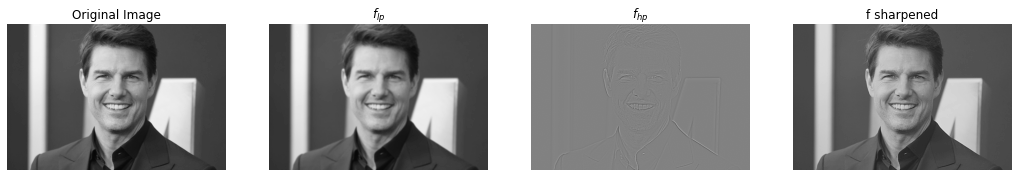

In [56]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

f = cv.imread(r'images/tom.jpg' , cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sigma = 2
gaussian_1D = cv.getGaussianKernel(5 , sigma)
f_lp = cv.sepFilter2D(f , -1 , gaussian_1D , gaussian_1D)
f_hp = f - f_lp
f_sharpened = cv.addWeighted(f , 1.0 , f_hp , 1.0 , 0)

fig , ax = plt.subplots(1 , 4 , figsize = (18 , 6))
ax[0].imshow(f , cmap = 'gray' , vmin = 0 , vmax = 255 )
ax[0].axis('off')
ax[0].title.set_text("Original Image")

ax[1].imshow(f_lp , cmap = 'gray' , vmin = 0 , vmax = 255)
ax[1].axis('off')
ax[1].title.set_text("$f_{lp}$")

ax[2].imshow(f_hp , cmap = 'gray')
ax[2].axis('off')
ax[2].title.set_text("$f_{hp}$")

ax[3].imshow(f_sharpened , cmap = 'gray')
ax[3].axis('off')
ax[3].title.set_text("f sharpened")